In [2]:
#manipulacao
import pandas as pd

#visualizacao
import seaborn as sns
import matplotlib.pyplot as plt

#manipular os path
import os

#dados ausentes
import missingno as msno

## Importando dados.

In [3]:
#Mostrando lista dos arquivos de vendas
path = './Sales_Data'

files = [file for file in os.listdir(path)]


annual_sale = pd.DataFrame()

for file in files:
    df = pd.read_csv(f"{path}/{file}")
    annual_sale = pd.concat([annual_sale, df])

In [4]:
annual_sale

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Tratando valores ausentes

In [5]:
#Mostrando a quantidade de valores ausentes
annual_sale.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
#vendo a forma do valores ausentes
annual_sale.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
11681,False,False,False,False,False,False
11682,False,False,False,False,False,False
11683,False,False,False,False,False,False
11684,False,False,False,False,False,False


<AxesSubplot: >

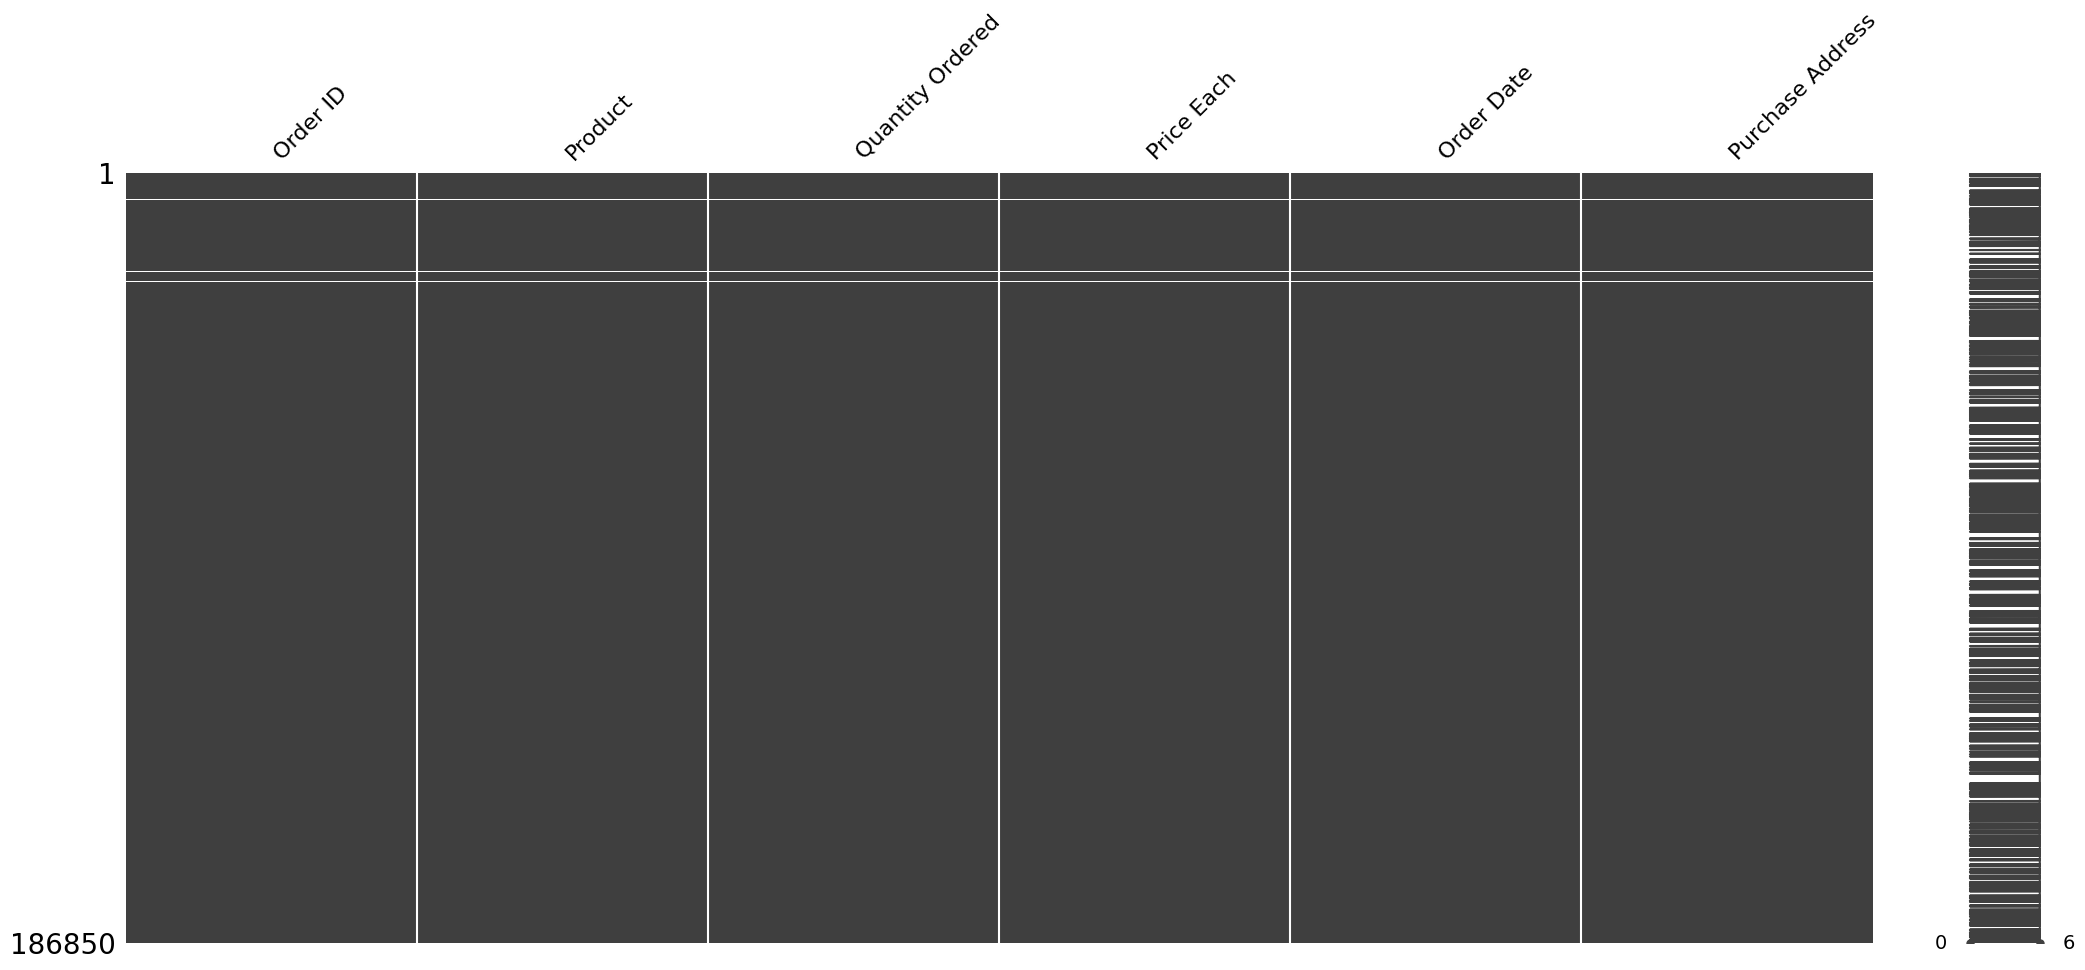

In [7]:
#visualizando os dados ausentes
msno.matrix(annual_sale)

Farei a exclusão dos dados ausentes pois as informações faltantes faltam na linha inteira. E por isso não ira prejudicar a análise.

In [8]:
#Exclusão dos dados
annual_sale = annual_sale.dropna()
annual_sale

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
#Verificando dados duplicados
annual_sale.duplicated().value_counts()

False    185687
True        618
dtype: int64

In [10]:
#removendo duplicatas
annual_sale = annual_sale.drop_duplicates()
annual_sale.duplicated().value_counts()
annual_sale.reset_index(inplace = True, drop=True)

In [11]:
annual_sale.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [12]:
annual_sale.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185682,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185683,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185684,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185685,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
185686,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [13]:
annual_sale.shape

(185687, 6)

Eu tinha uma data frame com 186850 linhas e depois das alterações obtive um dataframe com 185687, ao todo foram tiradas 1163 linhas entre dados duplicados e dados faltantes.

In [14]:
annual_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185687 entries, 0 to 185686
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


## Alterações

Perguntas do projeto:

1. Qual foi o melhor mês de vendas, e quanto foi ganho?
2. Qual cidade vendeu mais produtos?
3. Qual é o melhor horário para exibir anúncios afim de aumentar a chance de compra dos produtos?
4. Quais produtos frequentemente vendidos juntos?
5. Qual produto vendeu mais, e por que ele vendeu mais?


Para responder as perguntas do projeto, existem colunas que devem ser criadas e valores que devem ser alterados.

Alterações e criações:

* Alterar o tipo de dado da coluna Price Each de object para numérico.
* Alterar o tipo de dado da coluna Order Date de object para data.
* Criar coluna para o mês de venda.
* Criar coluna de com o nome da cidade.
* Quantity Ordered
* Criar coluna com o valor total de vendas.


#### Alterando Order Date

In [15]:
datas = pd.to_datetime(annual_sale['Order Date'])
datas

ParserError: Unknown string format: Order Date present at position 516

In [16]:
annual_sale.loc[516]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 516, dtype: object

Existe uma linha que é a cópia do nome das colunas, farei a exclusão dela.

In [17]:
annual_sale = annual_sale[annual_sale['Order Date'].str[:] != 'Order Date']
annual_sale['Order Date'] = pd.to_datetime(annual_sale['Order Date'])

In [18]:
annual_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 185686
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  object        
 3   Price Each        185686 non-null  object        
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [19]:
display(annual_sale.head())
display(annual_sale.tail())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185682,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
185683,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
185684,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
185685,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
185686,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


#### Criando a coluna Month

In [20]:
annual_sale['Month'] = annual_sale['Order Date'].dt.month
annual_sale.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Alterando Price Each

In [21]:
annual_sale['Price Each'] = pd.to_numeric(annual_sale['Price Each'])
annual_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 185686
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  object        
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 11.3+ MB


#### Alterando Quantity Ordered

In [36]:
annual_sale['Quantity Ordered'] = pd.to_numeric(annual_sale['Quantity Ordered'])
annual_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 185686
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  int64         
 7   City              185686 non-null  object        
 8   Sales             185686 non-null  float64       
 9   hour              185686 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 15.6+ MB


#### Criando a coluna City

In [23]:
def City(col):
    return col.split(',')[1].strip(' ')
    
def State(col):
    return col.split(',')[2].strip(' ')[:2]

In [24]:
annual_sale['City'] = annual_sale['Purchase Address'].apply(lambda x: f'{City(x)} ({State(x)})')
annual_sale.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


### Criando coluna Total Sales

In [25]:
annual_sale['Sales'] = annual_sale['Quantity Ordered'] * annual_sale['Price Each']

## EDA

In [26]:
annual_sale.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


### Qual foi o melhor mês de vendas, e quanto foi ganho?

In [27]:
meses = annual_sale.groupby(['Month'], as_index=False).agg(Total_Sale = ('Sales', 'sum'))                                                                                                       
meses = meses.sort_values('Total_Sale', ascending=False)
meses

,Month,Total_Sale
11,12,4608295.70
9,10,3734777.86
3,4,3389217.98
10,11,3197875.05
4,5,3150616.23
2,3,2804973.35
6,7,2646461.32
5,6,2576280.15
7,8,2241083.37
1,2,2200078.08


O mes que mais vendeu foi o dezembro
Valor arrecadado foi de 4608295.70 dólares


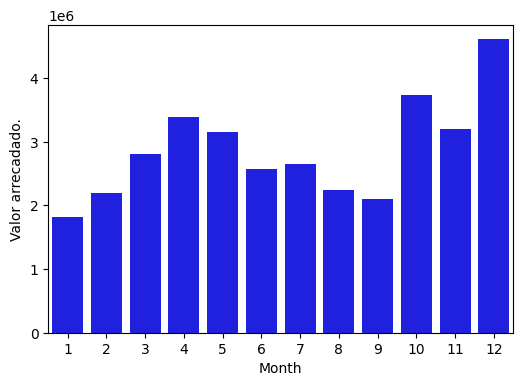

In [132]:
x =  meses.Month
y = meses.Total_Sale

plt.figure(figsize=(6,4))
sns.barplot(x=x, y=y, color='b')
plt.ylabel('Valor arrecadado.')

print(f'O mes que mais vendeu foi o dezembro')
print(f'Valor arrecadado foi de 4608295.70 dólares')

plt.show()

### Qual cidade vendeu mais produtos?

In [29]:
cidade = annual_sale.groupby('City', as_index=False).agg(Total_Order = ('Quantity Ordered', 'sum'))
cidade.sort_values('Total_Order', ascending=False)

,City,Total_Order
8,San Francisco (CA),50169
4,Los Angeles (CA),33247
5,New York City (NY),27903
2,Boston (MA),22494
3,Dallas (TX),16707
0,Atlanta (GA),16584
9,Seattle (WA),16534
7,Portland (OR),11291
1,Austin (TX),11137
6,Portland (ME),2746


A cidade que mais vendeu foi San Francisco.
Produtos vendidos: 50169


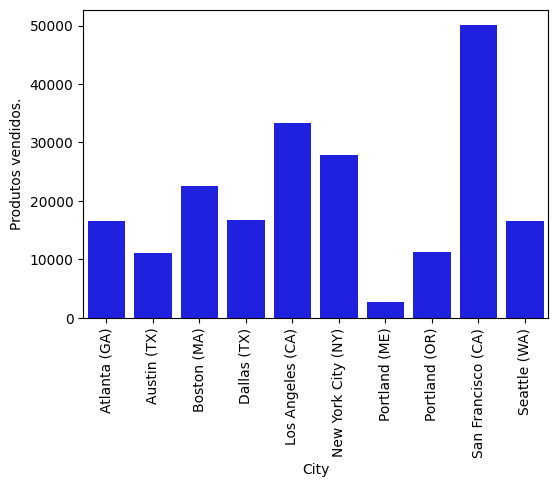

In [129]:
x =  cidade.City
y =  cidade.Total_Order

plt.figure(figsize=(6,4))
sns.barplot(x=x, y=y, color='b')
plt.xticks(rotation=90)
plt.ylabel('Produtos vendidos.')
print(f'A cidade que mais vendeu foi San Francisco.')
print(f'Produtos vendidos: 50169')

plt.show()

### Qual é o melhor horário para exibir anúncios afim de aumentar a chance de compra dos produtos?

In [41]:
annual_sale['Hour'] = annual_sale['Order Date'].dt.hour
annual_sale.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,hour,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,08:46:00,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22:30:00,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14:38:00,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14:38:00,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,09:27:00,9


<AxesSubplot: xlabel='Hour', ylabel='Count'>

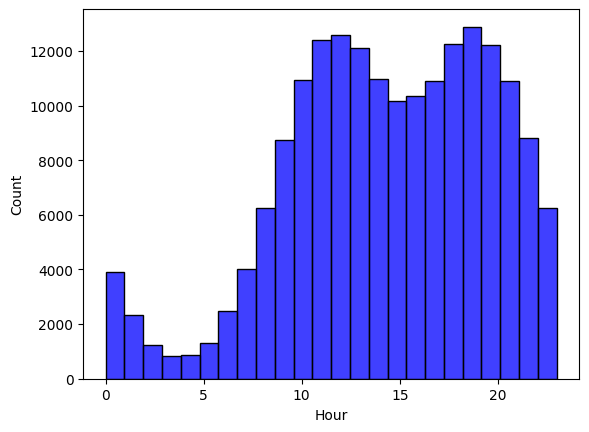

In [130]:
sns.histplot(data=annual_sale, 
             x='Hour', bins=24, color='b')

A maior frequência de comprar ocorre em dois momentos, a primeira por volta da 11 horas e a segunda por volta das 19 horas. Possivelmente exibir anúncios por volta desses períodos pode aumentar a chance de venda.

### Quais produtos frequentemente vendidos juntos?


In [47]:
annual_sale.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,hour,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,08:46:00,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22:30:00,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14:38:00,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14:38:00,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,09:27:00,9


In [94]:
df = annual_sale[annual_sale['Order ID'].duplicated(keep=False)]


df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

df2.head()

C:\Users\abraz\AppData\Local\Temp\ipykernel_19480\119111777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [113]:
#combinacao
from itertools import combinations

#Contador
from collections import Counter

#objeto para contagem ex: {objeto: quantidade}
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Os produtos que frequentemente vendidos juntos são: iPhone e Lightning Charging Cable, lembrando que foi feita uma contagem para produto que foram vendidos em pares.

### Qual produto vendeu mais, e por que ele vendeu mais?

In [120]:
annual_sale.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,hour,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,08:46:00,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22:30:00,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14:38:00,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14:38:00,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,09:27:00,9


In [138]:
grp_product_sum = annual_sale.groupby('Product', as_index=False).agg(Ordered = ('Quantity Ordered', 'sum'))
grp_product_sum

,Product,Ordered
0,20in Monitor,4126
1,27in 4K Gaming Monitor,6239
2,27in FHD Monitor,7541
3,34in Ultrawide Monitor,6192
4,AA Batteries (4-pack),27615
5,AAA Batteries (4-pack),30986
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
8,Flatscreen TV,4813
9,Google Phone,5529


In [155]:
grp_product_avg = annual_sale.groupby('Product', as_index=False).agg(Avg_Price = ('Sales', 'mean'))
grp_product_avg.sort_values(by='Avg_Price')

,Product,Avg_Price
5,AAA Batteries (4-pack),4.494864
4,AA Batteries (4-pack),5.158167
17,Wired Headphones,13.055481
15,USB-C Charging Cable,13.082733
12,Lightning Charging Cable,16.028531
7,Bose SoundSport Headphones,100.982531
0,20in Monitor,110.741518
2,27in FHD Monitor,150.850172
6,Apple Airpods Headphones,151.082126
8,Flatscreen TV,301.188986


<bound method NDFrame._add_numeric_operations.<locals>.min of                        Product    Avg_Price
0                 20in Monitor   110.741518
1       27in 4K Gaming Monitor   390.867086
2             27in FHD Monitor   150.850172
3       34in Ultrawide Monitor   381.097843
4        AA Batteries (4-pack)     5.158167
5       AAA Batteries (4-pack)     4.494864
6     Apple Airpods Headphones   151.082126
7   Bose SoundSport Headphones   100.982531
8                Flatscreen TV   301.188986
9                 Google Phone   600.760594
10                    LG Dryer   600.000000
11          LG Washing Machine   600.000000
12    Lightning Charging Cable    16.028531
13          Macbook Pro Laptop  1701.440373
14             ThinkPad Laptop  1000.474726
15        USB-C Charging Cable    13.082733
16             Vareebadd Phone   400.581114
17            Wired Headphones    13.055481
18                      iPhone   700.716374>

C:\Users\abraz\AppData\Local\Temp\ipykernel_19480\1063633302.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation='vertical', size=8)
C:\Users\abraz\AppData\Local\Temp\ipykernel_19480\1063633302.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


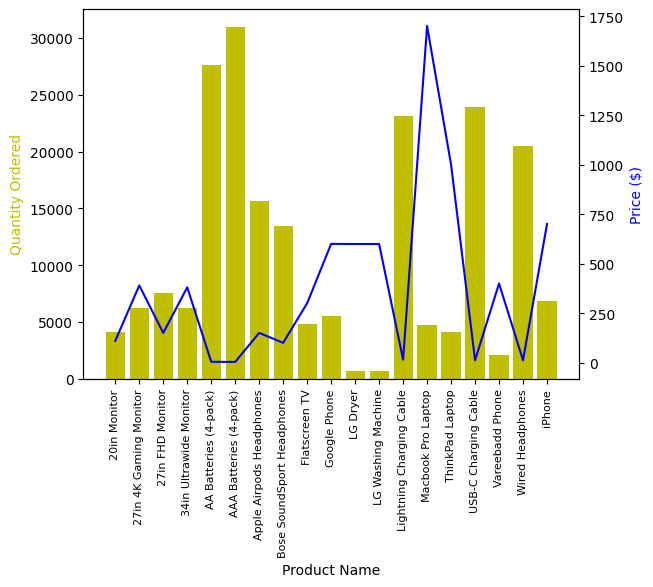

In [157]:
x = grp_product_sum.Product
y = grp_product_sum.Ordered


y1 = grp_product_avg.Avg_Price

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y, color='y')
ax2.plot(x, y1, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='y')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(x, rotation='vertical', size=8)

fig.show()

O produto mais vendido foi AAA Batteries (4-pack), muito possivelmente por possuir o menor valor médio de todos os produtos. Analisando o gráfico obseva-se que os produtos que mais vendem são so que tem menor preço médio. 